# Applying cuts to a CPSA file

Note: because of how ReadTheDocs works, this notebook is pre-executed

In [4]:

from cr39py import Scan,Cut
from pathlib import Path
from cr39py.core.data import data_dir

## Loading track data from CPSA file

In [5]:
# Load a sample test CPSA file bundled with cr39py
cpsa_path = data_dir / Path("test/test_alphas.cpsa")

# Create a Scan object
scan = Scan.from_cpsa(cpsa_path, etch_time = 120)

***CPSA header***
...Version: 104
...nx, ny microscope bins: 10, 13
...Nframes: 130
...Pixel size: 3.3e-01 um
...Threshold: 85
...Untilized camera image px NFPx, NFPy: 1314, 962
...Microscope frame size fx, fy: 4.3e+02 um, 3.1e+02 um


Reading CPSA file: 100%|██████████| 130/130 [00:00<00:00, 6188.33it/s]


The `cutplot()` method makes a standard figure that shows the CR39 tracks in several views.

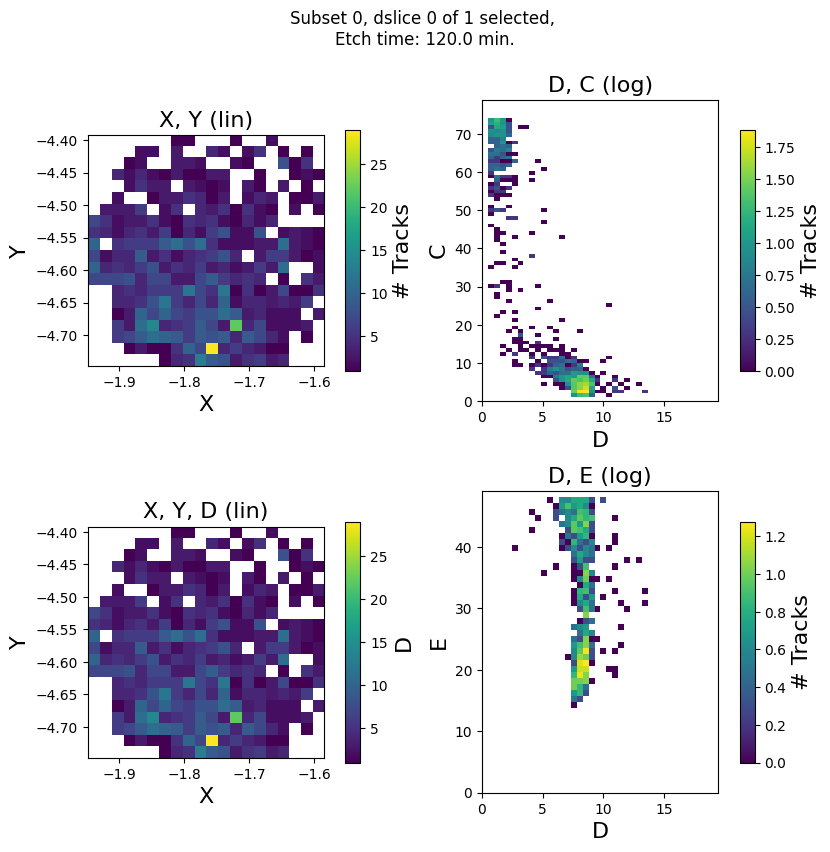

In [6]:
scan.cutplot();

## Applying cuts

Apply a cut to remove high contrast tracks, which are often noise

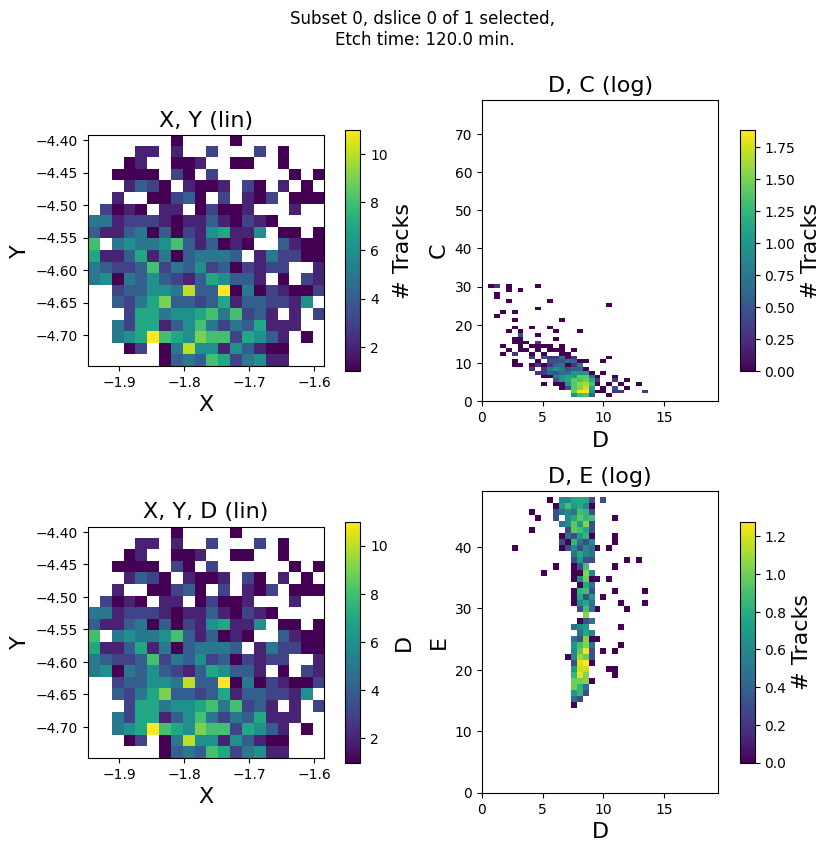

(<Figure size 900x900 with 8 Axes>,
 <Axes: title={'center': 'D, E (log)'}, xlabel='D', ylabel='E'>)

In [7]:
scan.add_cut(cmin=30)
scan.cutplot()

Add a second cut eliminating some lower diameter tracks. This time, to demonstrate another possible interface, we will create the cut first, then pass it to the scan object.

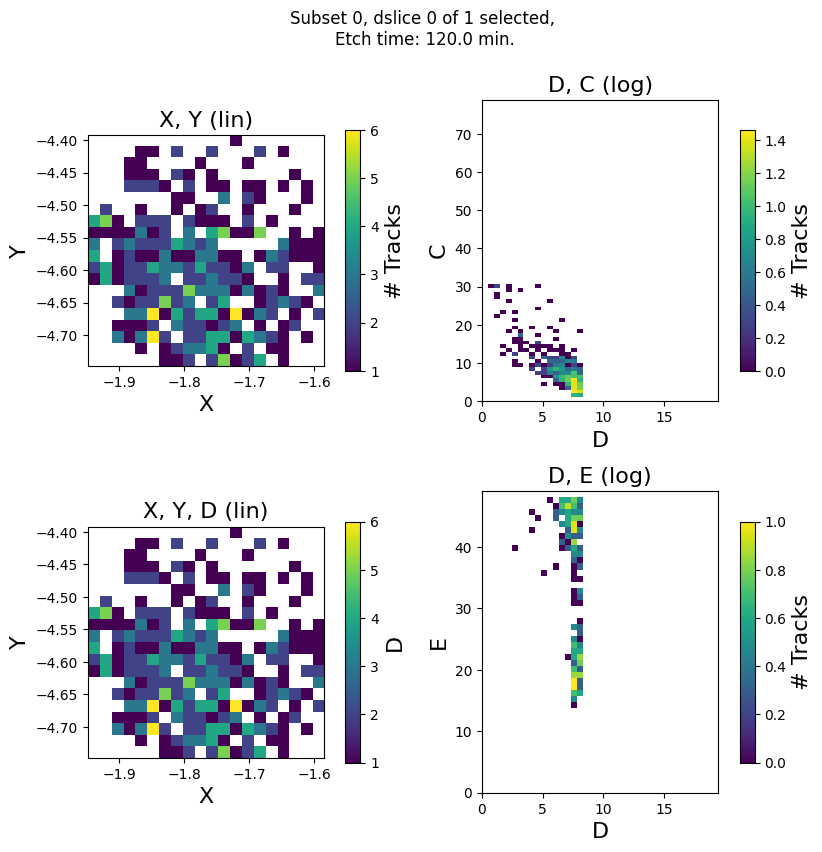

In [8]:
c = Cut(dmin=8)
scan.add_cut(c)
scan.cutplot();

Let's break the data into bins by diameter, which approximately corresponds to different energies. Dslicse are created such that each dslice has an equal number of tracks.

 The method `set_ndslices` will set the number of dslices for the current subset, and `select_dslice` will then allow us to select different slices. `select_dslicse(None)` will re-select all dslices.

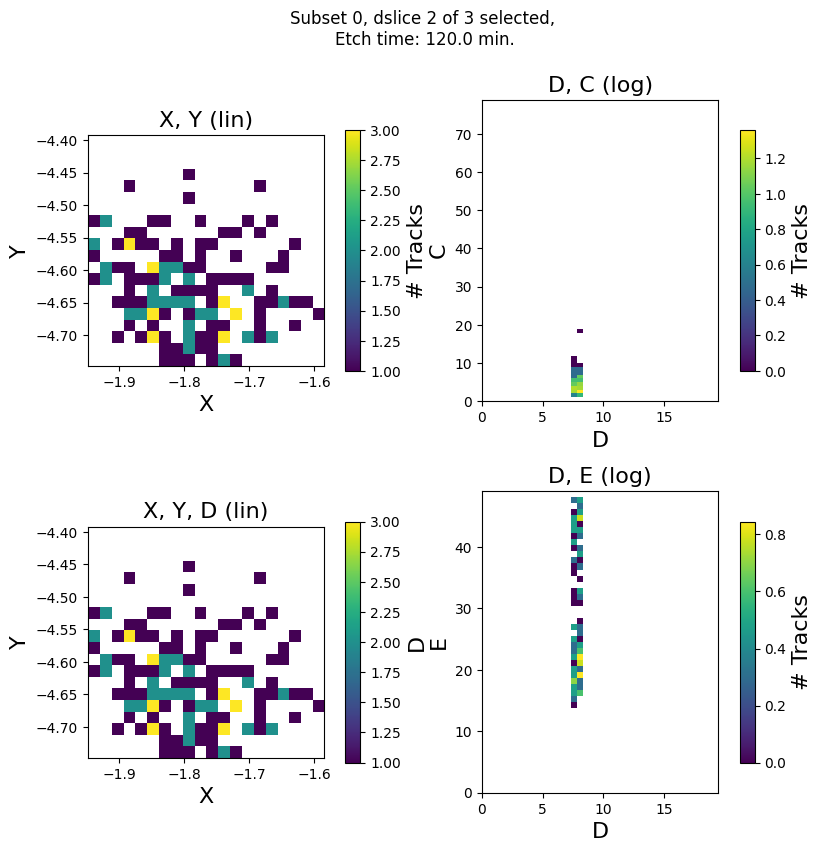

In [9]:
scan.set_ndslices(3)
scan.select_dslice(2)
scan.cutplot();


Finally, let's create a new subset on which we can make a separate series of cuts without affecting those on the first subset. `add_subset()` with no argument will create a new, empty subset. Subsets are zero-indexed, so the new subset will be stored at index 1.

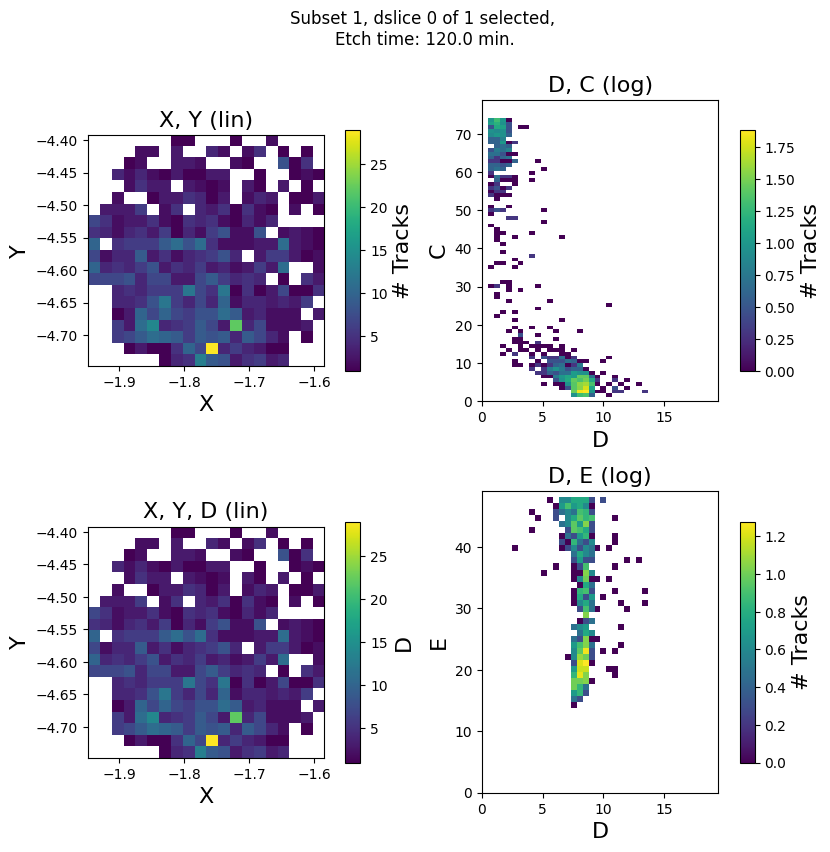

In [10]:
scan.add_subset()
scan.select_subset(1)
scan.cutplot();

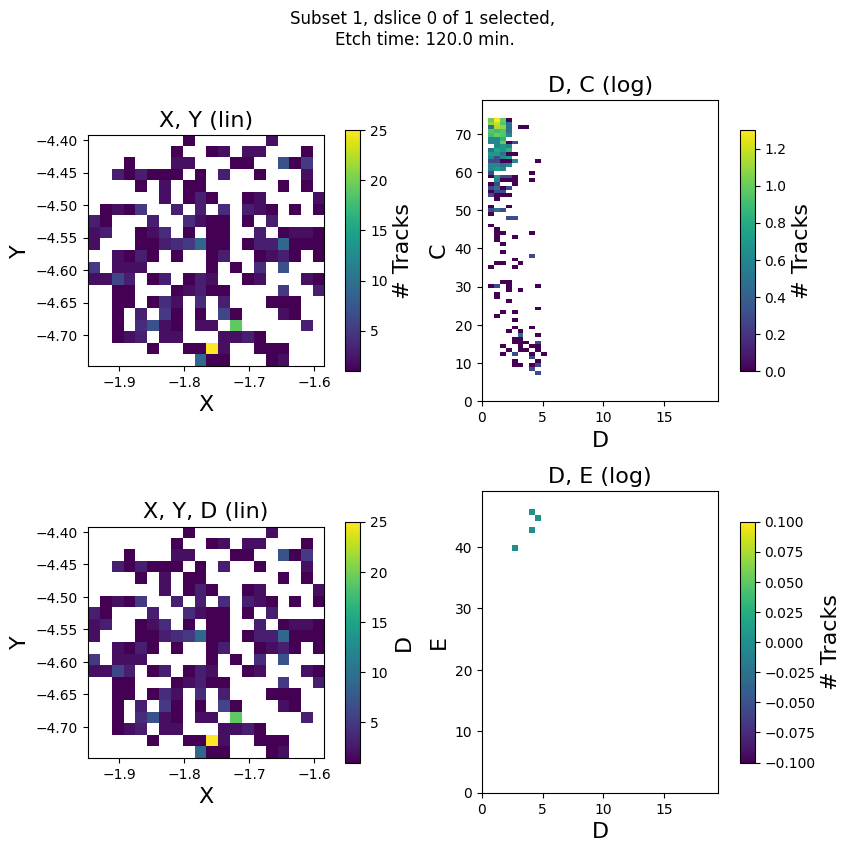

In [11]:
scan.add_cut(dmin=5)
scan.cutplot();